# Assignment 3

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [2]:
import pymc as pm

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

### Exercise 1 Bayesian exercises - Theory

<font face='Calibri'><font size=3> Answer:</br>1. $logp_{\theta } (x)$ is the prior probability of the data. Since it does not dependent on z, it is essentially a normalization constant. In addition, $E(a)=a$, if $a$ is a constant. So we could write as line 1.</br></br>
2. the product rule is used here. $p(z,x)=p(z|x)p(x)$</br></br>
3. Multiply both the numerator and denominator by $q_{\phi} (z|x)$</br></br>
4. The Logarithmic Formula and the properties of Expectation are used here. $log_a(MN)=log_aM+log_aN$ and $E(X+Y)=E(X)+E(Y)$

### Exercise 2 Bayesian exercises - Practical

<font face='Calibri'><font size=3> Answer:</br>1. `x = pm.Data('x', x_data)` should be corrected as `x = pm.Data('x', x_data, mutable=True)` Because in this way, the x is keeping updated to predict y.</br></br>
2.`s = pm.Normal("sigma", sigma=0.001)` should be corrected as `s = pm.HalfNormal("sigma", sigma=0.001)` Because the sigma should be a non-negative value.</br></br>
3. `likelihood = pm.Normal("y", mu=a*x + b, sigma=s)` should be corrected as `likelihood = pm.Normal("y", mu=a*x + b, sigma=s, observed=y_data)` Because the information of the observed data is needed to define the likelihood function.</br></br>
4. `trace = pm.sample(1000, tune=1000, init=None, step=step, cores=2)` should be corrected as `trace = pm.sample(1000, tune=1000, init=None, step=step, chains=2)` The "cores" means the number of chains to run in parallel processing tasks. We need to define "chains" in the MCMC method here.</br></br>
p.s. </br>`y = pm.Data('y_obs', y_data)` is not necessary.</br>
</br>
`a = pm.Normal("slope", mu=100, sigma=100)
b = pm.Normal("intercept", mu=100, sigma=100)
s = pm.Normal("sigma", sigma=0.001)`
The value of mu and sigma is weird, but it still could work.

### Exercise 3 Clustering I

In [4]:
from sklearn.cluster import KMeans

In [5]:
import numpy as np
# read in the data
dataTrain = np.loadtxt('IDSWeedCropTrain.csv', delimiter=',')
dataTest = np.loadtxt('IDSWeedCropTest.csv', delimiter=',')
# split input variables and labels
XTrain = dataTrain[:, :-1]
YTrain = dataTrain[:, -1]
XTest = dataTest[:, :-1]
YTest = dataTest[:, -1]

In [6]:
from sklearn.cluster import KMeans
startingPoint = np.vstack((XTrain[0,], XTrain[1,]))
kmeans = KMeans(2, n_init = 1, init= startingPoint, algorithm = "full").fit(XTrain) #set k=2
print(kmeans.cluster_centers_)

[[5.69426752e+00 4.93800425e+01 7.91594480e+02 3.84771338e+03
  3.38588535e+03 1.35988535e+03 2.93734607e+02 1.31609342e+02
  7.07282378e+01 3.96433121e+01 1.94437367e+01 4.23566879e+00
  4.41613588e-01]
 [2.19092628e+00 1.37315690e+01 1.70943289e+02 1.39436484e+03
  3.18853497e+03 2.62461815e+03 1.00372023e+03 6.32814745e+02
  4.95829868e+02 2.95400756e+02 1.45809074e+02 2.91984877e+01
  2.83742911e+00]]


C:\Users\dell\anaconda3\envs\IDS-A1\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [7]:
df = pd.DataFrame()
df["feature6"] = XTest[:, 6]
df["feature7"] = XTest[:, 7]
df["feature1"] = XTest[:, 1]
df["feature2"] = XTest[:, 2]
df["label"] = YTest

type0 = df[df['label'].isin([0])]
type1 = df[df['label'].isin([1])]

df_type0 = pd.DataFrame()
df_type0["feature6"] = type0["feature6"]
df_type0["feature7"] = type0["feature7"]
df_type0["feature1"] = type0["feature1"]
df_type0["feature2"] = type0["feature2"]
df_type0["label"]= type0["label"]

df_type1 = pd.DataFrame()
df_type1["feature6"] = type1["feature6"]
df_type1["feature7"] = type1["feature7"]
df_type1["feature1"] = type1["feature1"]
df_type1["feature2"] = type1["feature2"]
df_type1["label"]= type1["label"]

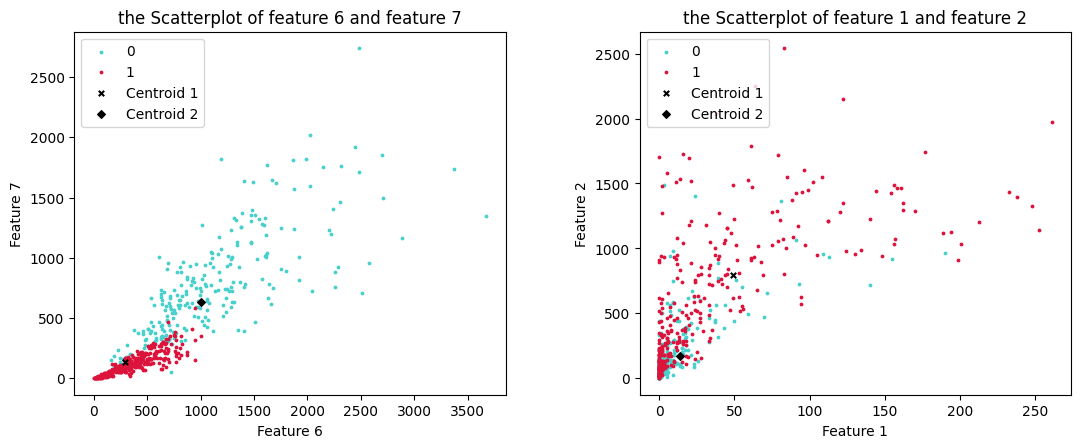

In [8]:
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(2,2,1,title='the Scatterplot of feature 6 and feature 7',xlabel='Feature 6',ylabel='Feature 7')
ax2 = fig.add_subplot(2,2,2,title='the Scatterplot of feature 1 and feature 2',xlabel='Feature 1',ylabel='Feature 2')
ax1.scatter(data=df_type0,x='feature6',y='feature7',color='mediumturquoise',s=3,label='0')
ax1.scatter(data=df_type1,x='feature6',y='feature7',color='crimson',s=3,label='1')
ax1.scatter(x=293.73, y=131.61,s=15,marker='x',c='black',label='Centroid 1')
ax1.scatter(x=1003.72, y=632.81,s=15,marker='D',c='black',label='Centroid 2')
ax2.scatter(data=df_type0,x='feature1',y='feature2',color='mediumturquoise',s=3,label='0')
ax2.scatter(data=df_type1,x='feature1',y='feature2',color='crimson',s=3,label='1')
ax2.scatter(x=49.38, y=791.59,s=15,marker='x',c='black',label='Centroid 1')
ax2.scatter(x=13.73, y=170.94,s=15,marker='D',c='black',label='Centroid 2')

ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
fig.subplots_adjust(wspace=1)
fig.tight_layout(pad=5)

plt.show()

<font face='Calibri'><font size=3>1) The description of software used: </br>At first, two random points are chosen as the centroids, and the points are assigned to two centroids (two clusters formed). Then, the distances between points and centroids are calculated by iterating centroids and data assignment, until the sum of distances is to a minimum. In the end, the optimized centroids are found and the iteration stops.</br></br>2) Values of two cluster centers: </br>The first cluster center: [5.69, 49.38, 791.59, 3847.71, 3385.89, 1359.89, 293.73, 131.61, 70.73, 39.64, 19.44, 4.24, 0.44]</br>The second cluster center: [2.19, 13.73, 170.94, 1394.36, 3188.53, 2624.62, 1003.72, 632.81, 495.83, 295.4, 145.8, 29.2, 2.84]</br></br>3) Two plots: The plots show different clusters of Test data (the blue and red "clusters" are defined by the labels, not by the algorithm). In the left plot, the two clusters have distinct characteristics. But in the right plot, two clusters are overlapped more.</br>
p.s. the centroids are plotted just for verifying. In the two plots, we could see the location of the centroids make sense (to some extent). So, the k-means algorithm works well here.</br></br> </font>